# Data Wrangling

### Import Libraries and Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt

In [2]:
job_data = pd.read_csv('../raw data/DataAnalyst.csv')

In [3]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [4]:
#remove the unnamed column
job_data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [5]:
job_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


### Check for Missing Values

In [6]:
missing = pd.concat([job_data.isnull().sum(), 100 * job_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count','%'],ascending= False)

,count,%
Company Name,1,0.044385
Job Title,0,0.000000
Salary Estimate,0,0.000000
Job Description,0,0.000000
Rating,0,0.000000
Location,0,0.000000
Headquarters,0,0.000000
Size,0,0.000000
Founded,0,0.000000
Type of ownership,0,0.000000


Sometimes 'missingness' can be encoded, perhaps by a -1 or 999 since isnull() is not the only indicator of missing data, we need to do some investigation here.

In [7]:
#converting data types
job_data = job_data.astype({'Job Title':'string','Salary Estimate':'string','Job Description':'string','Company Name':'string',
                           'Location':'string','Headquarters':'string','Size':'string','Type of ownership':'string',
                           'Industry':'string','Sector':'string','Revenue':'string','Competitors':'string','Easy Apply':'string'})
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   string 
 1   Salary Estimate    2253 non-null   string 
 2   Job Description    2253 non-null   string 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   string 
 5   Location           2253 non-null   string 
 6   Headquarters       2253 non-null   string 
 7   Size               2253 non-null   string 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   string 
 10  Industry           2253 non-null   string 
 11  Sector             2253 non-null   string 
 12  Revenue            2253 non-null   string 
 13  Competitors        2253 non-null   string 
 14  Easy Apply         2253 non-null   string 
dtypes: float64(1), int64(1), string(13)
memory usage: 264.1 KB


In [8]:
job_data['Competitors'].value_counts()

-1                                                      1732
Adecco, Manpower                                          14
Robert Half, Insight Global                               14
TEKsystems, Insight Global, Accenture                     10
Artech Information Systems, Mindlance, Tech Mahindra      10
                                                        ... 
Randstad, Kelly                                            1
Stanley Black & Decker, Milwaukee Tool                     1
KPMG, Accenture, Deloitte                                  1
Gartner, Forrester, IDC                                    1
DrugDev , Bracket, Bioclinica                              1
Name: Competitors, Length: 291, dtype: Int64

In [9]:
job_data['Salary Estimate'].value_counts()

$42K-$76K (Glassdoor est.)    57
$41K-$78K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$58K-$93K (Glassdoor est.)    31
                              ..
$47K-$81K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$43K-$77K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
-1                             1
Name: Salary Estimate, Length: 90, dtype: Int64

In [10]:
job_data['Rating'].value_counts()

-1.0    272
 3.9    140
 3.6    135
 3.7    132
 5.0    131
 3.8    130
 4.0    129
 3.5    125
 4.1    119
 3.3    109
 3.4    101
 3.2     91
 3.1     68
 3.0     57
 4.3     55
 4.2     47
 4.5     47
 4.6     46
 4.4     46
 2.8     43
 2.9     40
 2.5     32
 4.8     29
 2.7     25
 4.7     23
 4.9     17
 2.6     14
 2.4     10
 1.0     10
 2.3      9
 2.0      6
 2.1      4
 2.2      3
 1.6      2
 1.8      2
 1.9      2
 1.7      2
Name: Rating, dtype: int64

In [11]:
job_data['Size'].value_counts()

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: Size, dtype: Int64

In [12]:
job_data['Revenue'].value_counts()

Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
-1                                  163
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: Int64

In [13]:
job_data['Founded'].value_counts()

-1       660
 2008     80
 1996     54
 2000     54
 2002     54
        ... 
 1924      1
 1922      1
 1918      1
 1908      1
 1682      1
Name: Founded, Length: 161, dtype: int64

It seems like some of the columns contain null data like -1, '-1', -1.0, 'Unknown', and 'Unknown / Non-Applicable',and we need to clean these.

In [14]:
job_data=job_data.replace(-1,np.nan)
job_data=job_data.replace(-1.0,np.nan)
job_data=job_data.replace('-1',np.nan)
job_data=job_data.replace('Unknown',np.nan)
job_data=job_data.replace('Unknown / Non-Applicable',np.nan)

In [15]:
new_missing = pd.concat([job_data.isnull().sum(), 100 * job_data.isnull().mean()], axis=1)
new_missing.columns=['count', '%']
new_missing.sort_values(by=['count','%'],ascending= False)

,count,%
Easy Apply,2173,96.449179
Competitors,1732,76.875277
Revenue,778,34.531735
Founded,660,29.294274
Industry,353,15.667998
Sector,353,15.667998
Rating,272,12.072792
Size,205,9.098979
Type of ownership,179,7.944962
Headquarters,172,7.634265


In [16]:
job_data[job_data['Company Name'].isna()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
1860,Data Analyst,$53K-$99K (Glassdoor est.),"Kindred at Home, part of the Kindred at Home f...",NaN,<NA>,"Mooresville, NC",<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


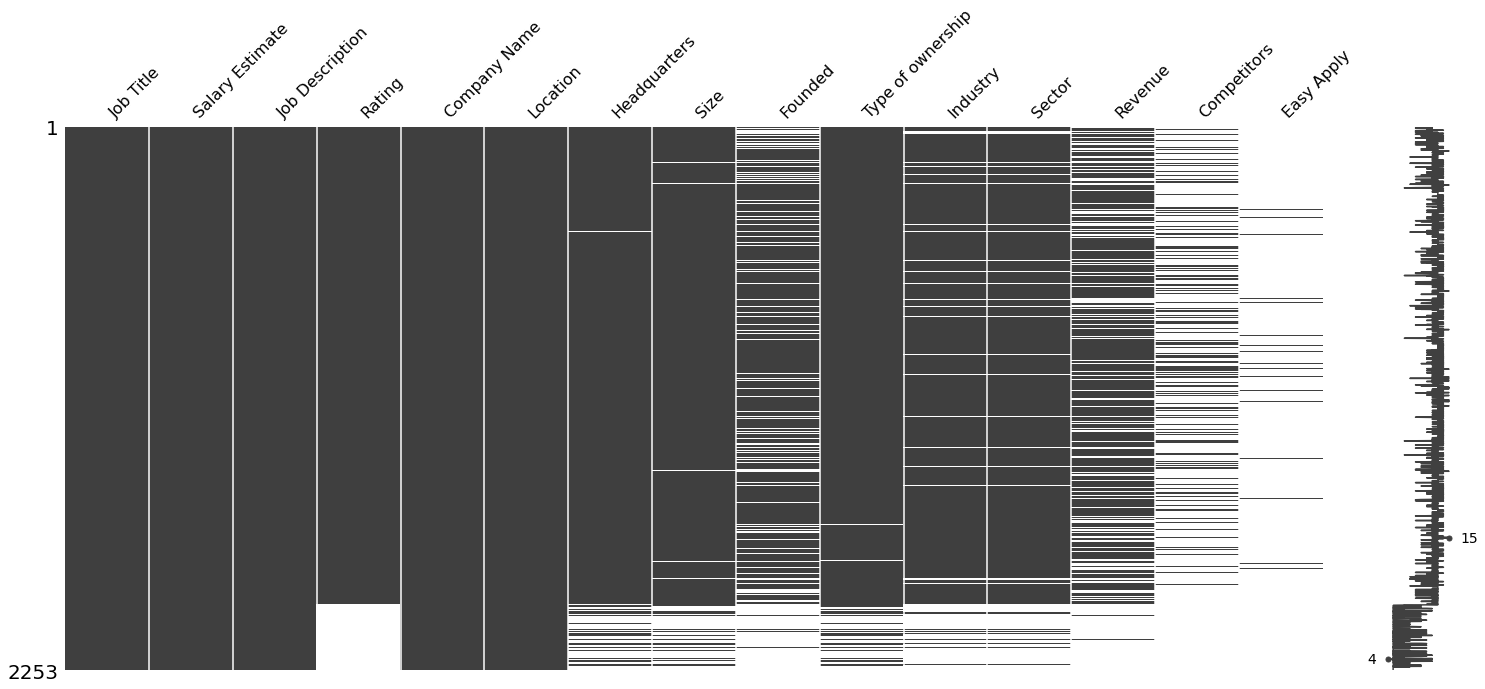

In [17]:
# Visualize missingness
msno.matrix(job_data.sort_values(by = 'Rating',ascending = True))
plt.show()

Now we can see that 'Easy Apply' and 'Competitors' have maximum number of missing values, which are 96% and 77%, respectively. According to Glassdoor, 'Easy Apply' is a job application mechanism that allows job seekers to apply to a job requisition directly on Glassdoor. Since these two columns are not features that directly related to the salary, we will drop these columns. There is essentially no information in these two columns.
In addition, notice that there seems to be a pattern on some of the missing data. For examples, missing industry info always occur with missing sector info; also, the missingness of headquaters, size, type of ownership, and revenue are very consistent, and when these data are missing, the rating is missing too. We can investigate further on these findings later.
For these reasons, we may want to consider droping all rows with missing rating after we explore the distributions of other features.

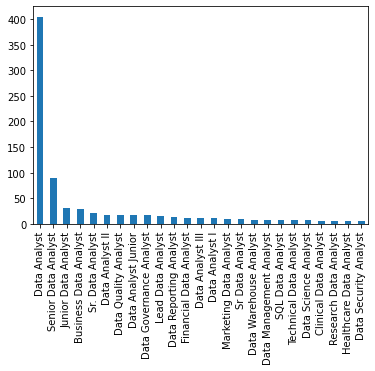

In [18]:
job_data['Job Title'].value_counts().head(25).plot(kind = 'bar')
plt.show()

In [19]:
#Drop Competitors and Easy Apply
job_data.drop(['Competitors','Easy Apply'], axis=1,inplace=True)

In [20]:
#Drop the one row with missing Salary infomation since salary is our target.
job_data.drop(job_data[job_data['Salary Estimate'].isna()].index,inplace=True)

In [21]:
# How should we impute? 

### Columns - Data Types and Formats

Since the info about how long a history a company has will be more useful than the info about which year the company was founded, we change the column ' Founded' to 'Years Founded'.

In [22]:
#Change the column ' Founded' to 'Years Founded'
today_year = dt.date.today().year
job_data['Years Founded'] = today_year - job_data['Founded']
job_data.drop(['Founded'],axis=1,inplace = True)

In [23]:
#Split salary into two columns min salary and max salary.
job_data['Salary Estimate'] = job_data['Salary Estimate'].str.strip('(Glassdoor est.)')
job_data['Min_Salary($K)'] = job_data['Salary Estimate'].str.split('-').str.get(0).str.strip('$K').astype('int')
job_data['Max_Salary($K)'] = job_data['Salary Estimate'].str.split('-').str.get(1).str.strip('$K').astype('int')
job_data.drop(['Salary Estimate'], axis=1,inplace=True)

We see that the entries in the column Company Name always have the rating attached to it at the end when ratings are not missing, and we want to keep only the company name in that column.

In [24]:
#Remove the rating in the column 'Company Name'
job_data['Company Name'] = job_data['Company Name'].str.split('\n').str.get(0)

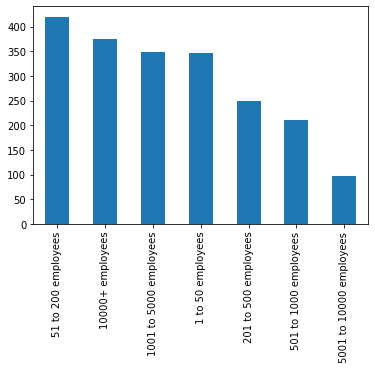

In [31]:
#What to do with Size?
job_data['Size'].astype('category').value_counts().plot(kind='bar')
plt.show()


In [27]:
job_data.select_dtypes('string').head()

,Job Title,Job Description,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD)
1,Quality Data Analyst,Overview Provides analytical and technical su...,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,<NA>
3,Data Analyst,Requisition NumberRR-0001939 Remote:Yes We col...,"New York, NY","McLean, VA",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD)
4,Reporting Data Analyst,ABOUT FANDUEL GROUP FanDuel Group is a world-...,"New York, NY","New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD)


#### Distributions Of Feature Values

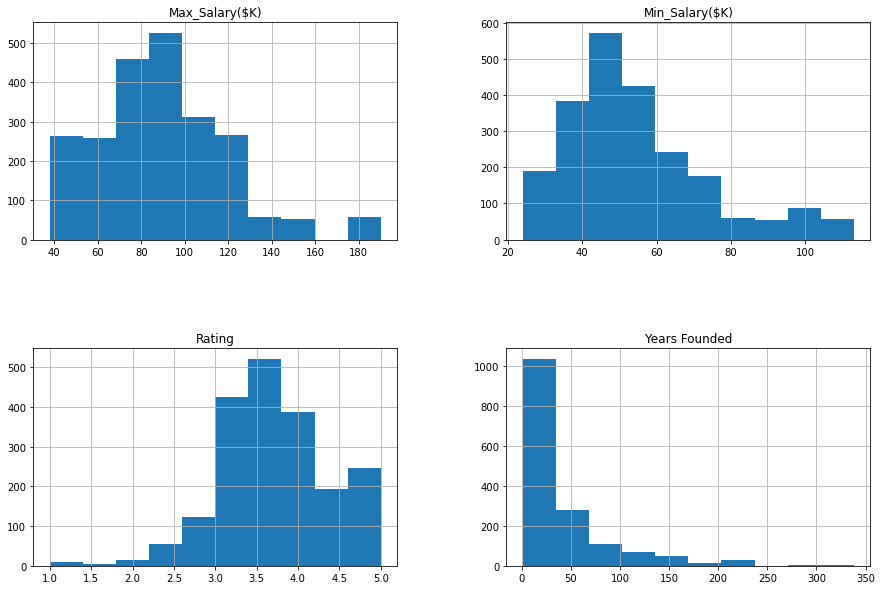

In [28]:
job_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

We see that most companies have 0-240 years of history, and so we want to look into those with the longest length of history to see if the the Years Founded was recorded correctly. 

In [29]:
job_data[job_data['Years Founded']>250]

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Years Founded,Min_Salary($K),Max_Salary($K)
1088,Data Analyst,University Overview The University of Pennsyl...,4.3,University of Pennsylvania,"Philadelphia, PA","Philadelphia, PA",10000+ employees,College / University,Colleges & Universities,Education,<NA>,280.0,41,78
1096,Neuroimaging Data Analyst Junior,University Overview The University of Pennsyl...,4.3,University of Pennsylvania,"Philadelphia, PA","Philadelphia, PA",10000+ employees,College / University,Colleges & Universities,Education,<NA>,280.0,38,68
1105,Clinical Data Analyst,University OverviewThe University of Pennsylva...,4.3,University of Pennsylvania,"Philadelphia, PA","Philadelphia, PA",10000+ employees,College / University,Colleges & Universities,Education,<NA>,280.0,38,68
1123,Senior Data Analyst,University Overview The University of Pennsyl...,4.3,University of Pennsylvania,"Philadelphia, PA","Philadelphia, PA",10000+ employees,College / University,Colleges & Universities,Education,<NA>,280.0,37,44
1126,Data Analyst D,University Overview The University of Pennsyl...,4.3,University of Pennsylvania,"Philadelphia, PA","Philadelphia, PA",10000+ employees,College / University,Colleges & Universities,Education,<NA>,280.0,37,44
1845,Data Standardization Analyst(s),Role Profile Data Quality & Analytics is part...,3.2,London Stock Exchange Group,"Charlotte, NC","London, United Kingdom",1001 to 5000 employees,Company - Public,Stock Exchanges,Finance,$50 to $100 million (USD),322.0,54,75
2023,Data Systems Analyst (7199U,and increasing private philanthropy. UDAR prov...,4.1,University of California Berkeley,"Berkeley, CA","Berkeley, CA",10000+ employees,College / University,Colleges & Universities,Education,$500 million to $1 billion (USD),338.0,65,120


After doing some research work, we found that University of California Berkeley was founded in 1868 instead of 1682. We believe that's a record error and decide to correct it.

In [30]:
# Correct the 'Years Founded' for University of California Berkeley
job_data.loc[job_data['Company Name']=='University of California Berkeley\n4.1','Years Founded'] = today_year - 1868